<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/prototype_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. It is useful for classification, regression, and clustering tasks.

Source: UCI Machine Learning Repository

Inspiration:
Understanding lifestyle factors that contribute to obesity can help with early intervention, health recommendations, and machine learning applications in healthcare.

Column Descriptions:
Gender – Male or Female.
Age – The person’s age in years.
Height – Height in meters.
Weight – Weight in kilograms.
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
FAVC – If the person frequently consumes high-calorie foods (yes/no).
FCVC – Frequency of vegetable consumption (scale from 1 to 3).
NCP – Number of main meals per day.
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
SMOKE – Whether the person smokes (yes/no).
CH2O – Daily water intake (scale from 1 to 3).
SCC – If the person monitors their calorie intake (yes/no).
FAF – Physical activity frequency (scale from 0 to 3).
TUE – Time spent using technology (scale from 0 to 3).
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [334]:
df = pd.read_csv('cards_data.csv')
df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


#EDA

In [335]:
# Memahami Struktur Data

# Tinjau jumlah baris dan kolom dalam dataset.
df.shape

(6146, 13)

In [336]:
# Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [337]:
# datayang hilang
df.isnull().sum()

,0
id,0
client_id,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


In [338]:
df.describe(include='all')

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
count,6146.000000,6146.000000,6146,6146,6.146000e+03,6146,6146.000000,6146,6146.000000,6146,6146,6146.000000,6146
unique,NaN,NaN,4,3,NaN,259,NaN,2,NaN,3654,303,NaN,1
top,NaN,NaN,Mastercard,Debit,NaN,02/2020,NaN,YES,NaN,$0,02/2020,NaN,No
freq,NaN,NaN,3209,3511,NaN,377,NaN,5500,NaN,31,607,NaN,6146
mean,3072.500000,994.939636,NaN,NaN,4.820426e+15,NaN,506.220794,NaN,1.503091,NaN,NaN,2013.436707,NaN
std,1774.341709,578.614626,NaN,NaN,1.328582e+15,NaN,289.431123,NaN,0.519191,NaN,NaN,4.270699,NaN
min,0.000000,0.000000,NaN,NaN,3.001055e+14,NaN,0.000000,NaN,1.000000,NaN,NaN,2002.000000,NaN
25%,1536.250000,492.250000,NaN,NaN,4.486365e+15,NaN,257.000000,NaN,1.000000,NaN,NaN,2010.000000,NaN
50%,3072.500000,992.000000,NaN,NaN,5.108957e+15,NaN,516.500000,NaN,1.000000,NaN,NaN,2013.000000,NaN
75%,4608.750000,1495.000000,NaN,NaN,5.585237e+15,NaN,756.000000,NaN,2.000000,NaN,NaN,2017.000000,NaN


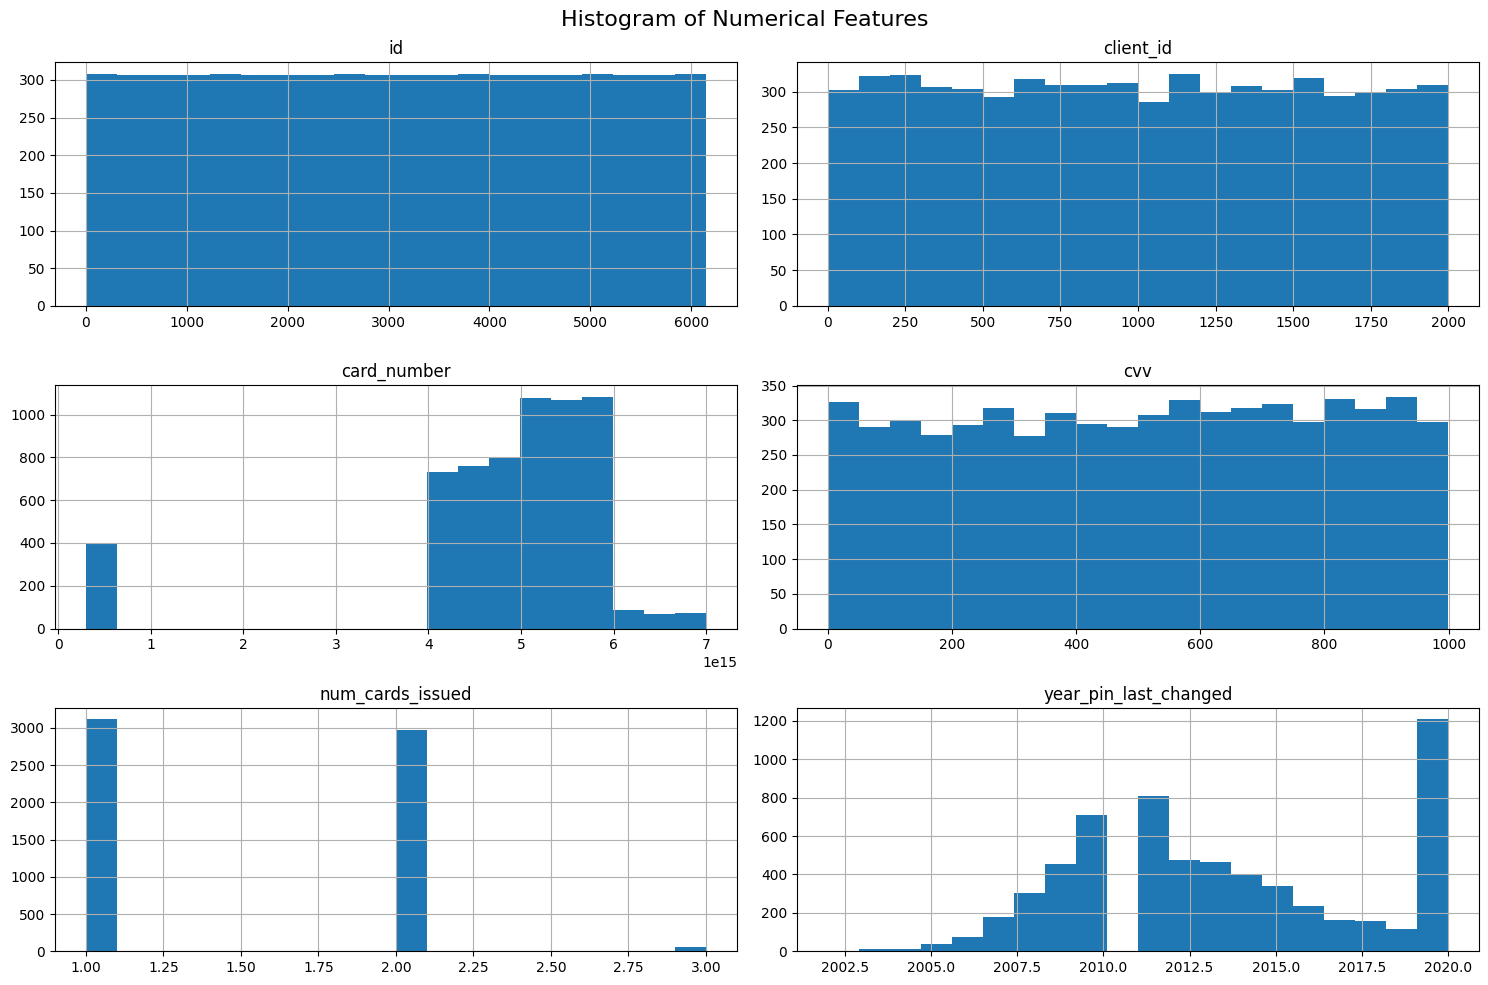

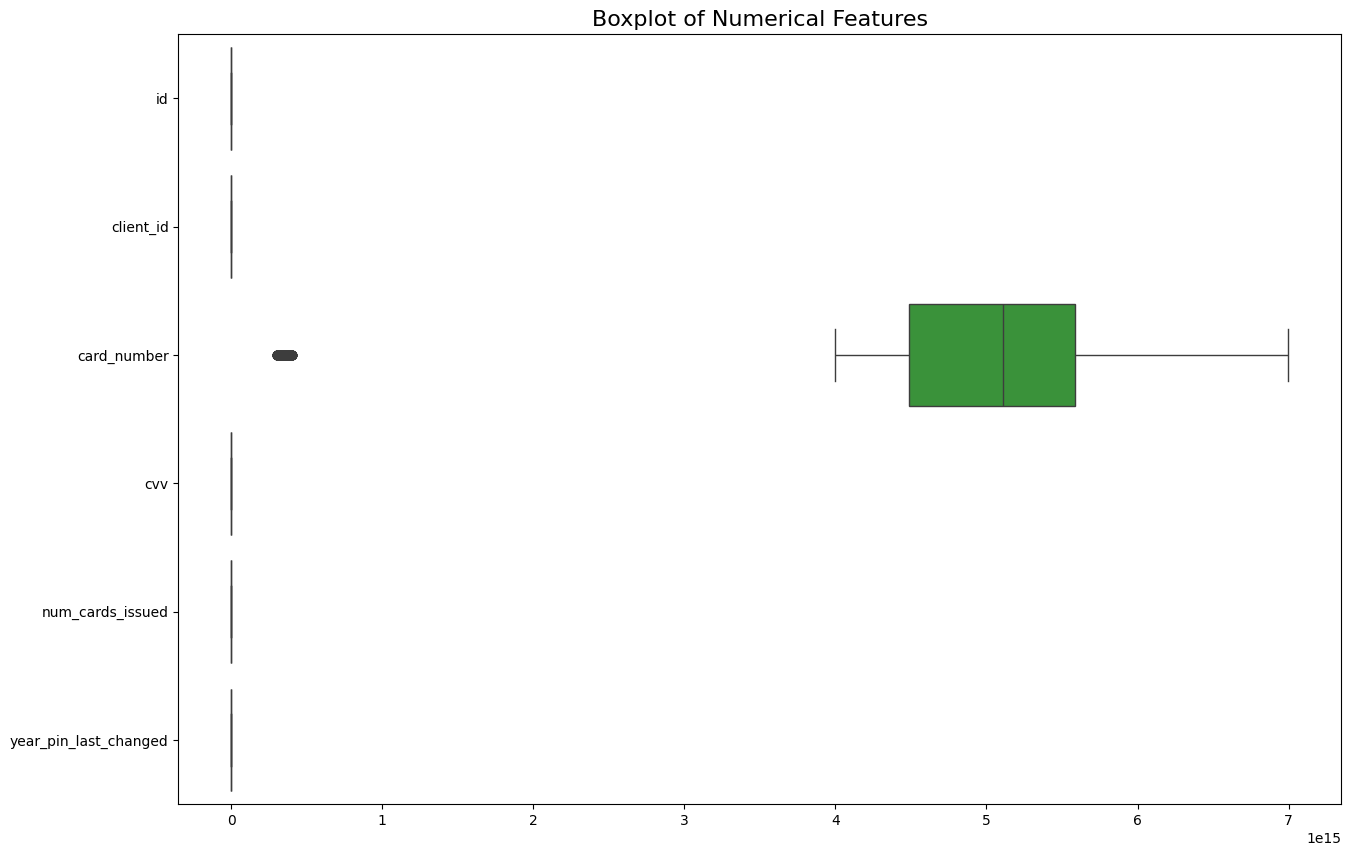

In [339]:
# Statistik deskriptif untuk variabel numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].describe()


import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi histogram untuk setiap variabel numerik
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Visualisasi boxplot untuk setiap variabel numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.show()


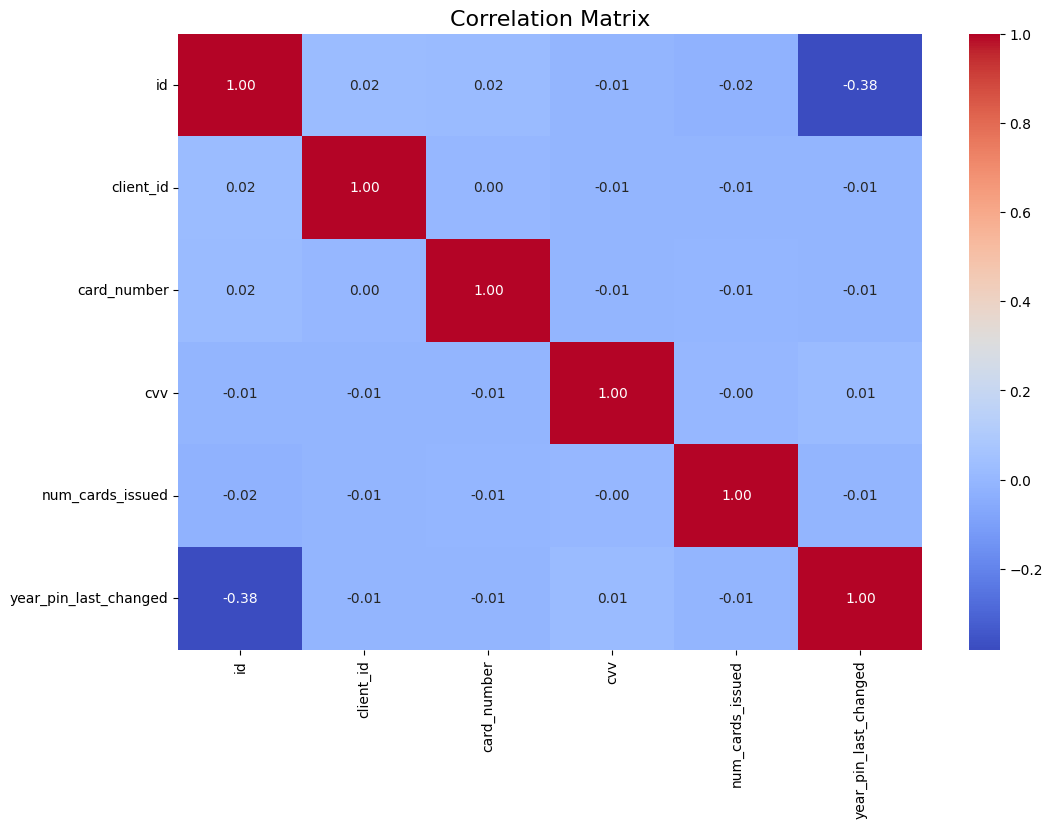

In [340]:
# Matriks Korelasi
correlation_matrix = df[numerical_cols].corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


#data prepocessing

In [341]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset (pastikan dataset sudah dimuat ke dalam dataframe 'df')
# df = pd.read_csv('data.csv')  # Jika perlu mengimpor data

# 1. Menghapus kolom yang tidak relevan
df = df.drop(columns=['id', 'client_id', 'card_number'])  # Menghapus kolom 'id', 'client_id', 'card_number'

# 2. Mengonversi variabel kategorikal menjadi numerik
# Menggunakan Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Kolom kategorikal yang perlu diubah
categorical_cols = ['card_brand', 'card_type', 'has_chip', 'card_on_dark_web']

# Apply Label Encoding pada setiap kolom kategorikal
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 3. Mengonversi kolom yang berformat string
# Mengubah 'expires' menjadi tahun yang lebih berguna
df['expires'] = pd.to_datetime(df['expires'], format='%m/%Y')
df['expires_year'] = df['expires'].dt.year

# Mengonversi 'credit_limit' menjadi numerik
df['credit_limit'] = df['credit_limit'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Mengonversi 'acct_open_date' menjadi tahun
df['acct_open_date'] = pd.to_datetime(df['acct_open_date'], format='%m/%Y')
df['acct_open_year'] = df['acct_open_date'].dt.year

# 4. Menangani missing values
df = df.fillna(df.mean())  # Mengisi missing values numerik dengan rata-rata

# 5. Standarisasi fitur numerik
numerical_cols = ['num_cards_issued', 'credit_limit', 'year_pin_last_changed', 'expires_year', 'acct_open_year']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Cek hasil preprocessing
print(df.head())






float64
   card_brand  card_type    expires  cvv  has_chip  num_cards_issued  \
0           3          1 2022-12-01  623         1           0.95716   
1           3          1 2020-12-01  393         1           0.95716   
2           3          1 2024-02-01  719         1           0.95716   
3           3          0 2024-08-01  693         0          -0.96907   
4           2          2 2009-03-01   75         1          -0.96907   

   credit_limit acct_open_date  year_pin_last_changed  card_on_dark_web  \
0      0.828028     2002-09-01              -1.273128                 0   
1      0.634329     2014-04-01               0.131908                 0   
2      2.669209     2003-07-01              -2.209819                 0   
3     -0.162109     2003-01-01              -0.336438                 0   
4     -1.191952     2008-09-01              -1.038956                 0   

   expires_year  acct_open_year  
0      0.421761       -1.390394  
1     -0.083579        0.536009  
2     

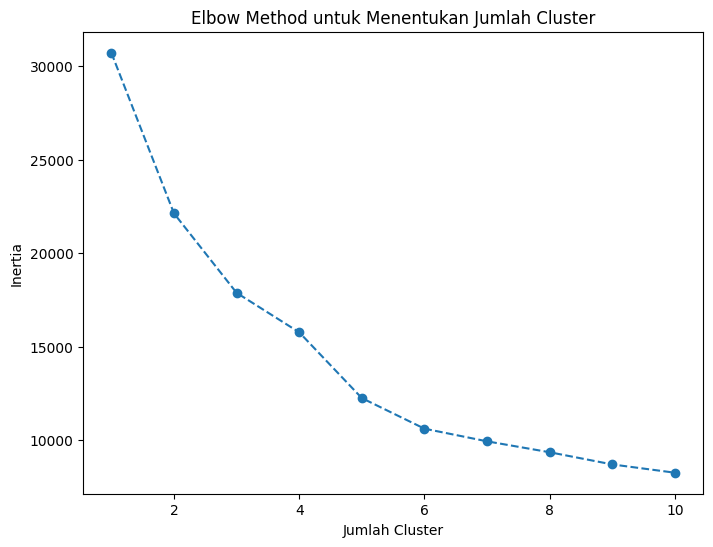

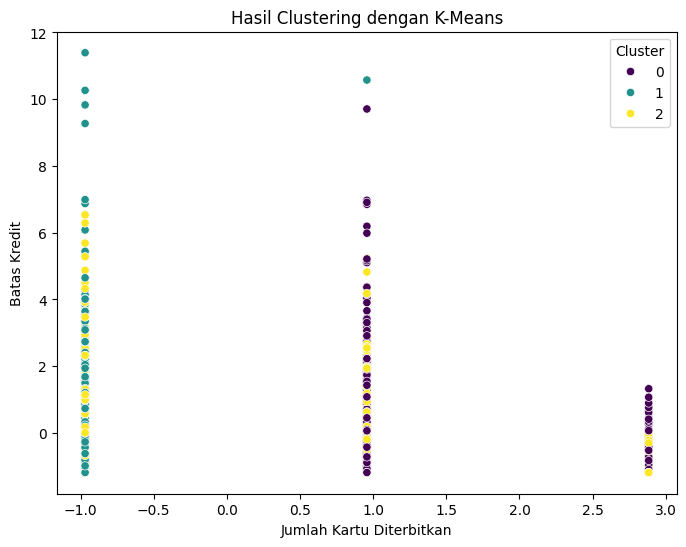

   num_cards_issued  credit_limit  cluster
0           0.95716      0.828028        0
1           0.95716      0.634329        0
2           0.95716      2.669209        0
3          -0.96907     -0.162109        1
4          -0.96907     -1.191952        1


In [342]:
# 6. Melakukan clustering menggunakan K-Means
# Kita hanya akan menggunakan fitur numerik yang relevan untuk clustering
features_for_clustering = df[['num_cards_issued', 'credit_limit', 'year_pin_last_changed', 'expires_year', 'acct_open_year']]

# 7. Tentukan jumlah cluster menggunakan Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

# Berdasarkan plot Elbow, pilih jumlah cluster terbaik (misalnya K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

# 8. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['num_cards_issued'], y=df['credit_limit'], hue=df['cluster'], palette='viridis')
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Jumlah Kartu Diterbitkan')
plt.ylabel('Batas Kredit')
plt.legend(title='Cluster')
plt.show()

# 9. Menampilkan beberapa hasil clustering
print(df[['num_cards_issued', 'credit_limit', 'cluster']].head())


In [343]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(features_for_clustering, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(features_for_clustering, df['cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Silhouette Score: 0.2998969166450393
Davies-Bouldin Index: 1.4017560427512652


#BDSCAN

Jumlah cluster yang terbentuk: 4
Jumlah noise points (label -1): 3


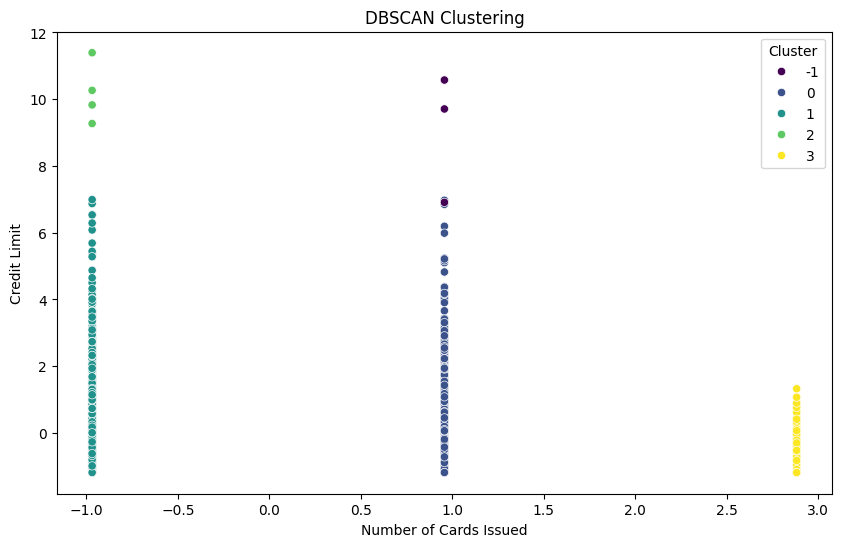

In [344]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Standarisasi data numerik
numerical_cols = ['num_cards_issued', 'credit_limit', 'year_pin_last_changed']
X = df[numerical_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Kamu bisa menyesuaikan eps dan min_samples
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Menampilkan jumlah cluster yang terbentuk
print(f"Jumlah cluster yang terbentuk: {len(set(df['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'].values else 0)}")
print(f"Jumlah noise points (label -1): {(df['dbscan_cluster'] == -1).sum()}")

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['num_cards_issued'], y=df['credit_limit'], hue=df['dbscan_cluster'], palette='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel('Number of Cards Issued')
plt.ylabel('Credit Limit')
plt.legend(title="Cluster", loc='best')
plt.show()


In [345]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['dbscan_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.36681759324513435


Silhouette Score: 0.7837670427336757


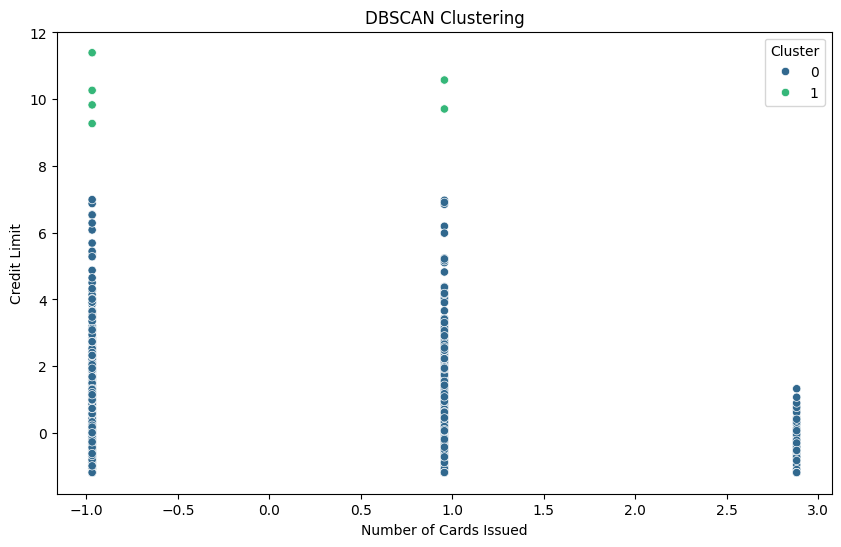

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Standarisasi data numerik
numerical_cols = ['num_cards_issued', 'credit_limit', 'year_pin_last_changed']
X = df[numerical_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=3)  # Kamu bisa menyesuaikan eps dan min_samples
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['dbscan_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['num_cards_issued'], y=df['credit_limit'], hue=df['dbscan_cluster'], palette='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel('Number of Cards Issued')
plt.ylabel('Credit Limit')
plt.legend(title="Cluster", loc='best')
plt.show()
